In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data_science.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.drop(['Unnamed: 0', 'salary'], axis=1, inplace=True)

In [5]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [8]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [11]:
df1.index, df1.values

(Index([2020, 2021, 2022], dtype='int64', name='work_year'),
 array([ 95813.  ,  99853.79, 124522.01]))

In [12]:
data = {
    'work_year': df1.index,
    'average_salary': df1.values
}

df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [14]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


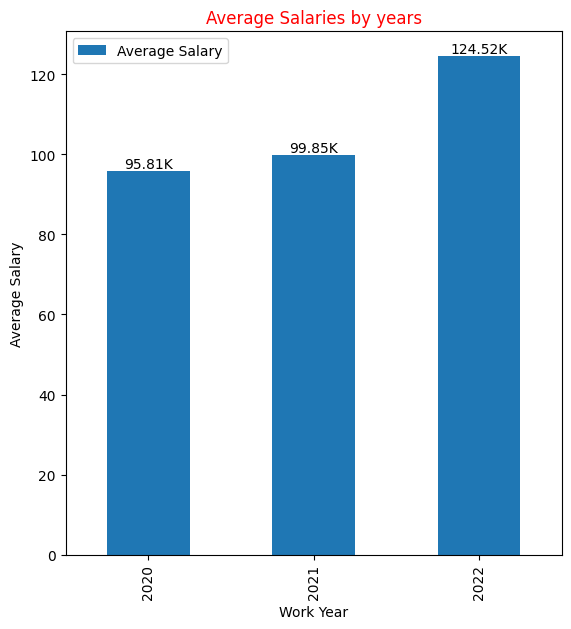

In [21]:
ax = df1.plot(kind='bar', x = 'work_year', y = 'average_salary', legend=True)
ax.bar_label(ax.containers[0], labels=df1['average_salary'].map('{:.2f}K'.format))
plt.subplots_adjust(top=1.2)
ax.legend(['Average Salary'], loc='upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by years', color='red')
plt.show()

In [22]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [24]:
df2 = df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [26]:
values = df2.to_list()

In [28]:
labels = ['Fully remote', 'No remote', 'Partially remote']

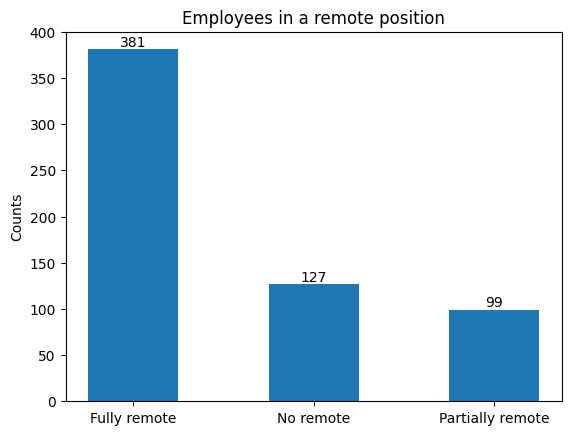

In [31]:
z = plt.bar(labels, values, width=0.5)
plt.bar_label(z, labels=values)
plt.title('Employees in a remote position')
plt.ylabel('Counts')
plt.show()

In [34]:
df3 = df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [36]:
df3.index.to_list()

['M', 'L', 'S']

In [38]:
values2 = df3.values

In [43]:
labels_for_company = ['Medium', 'Large', 'Small']

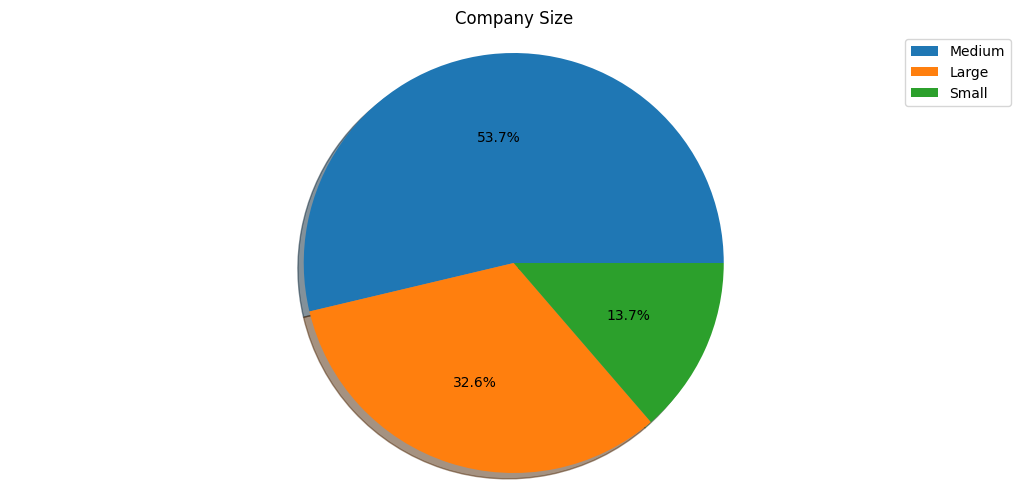

In [46]:
plt.figure(figsize=(13, 6))
plt.pie(x = values2, labels=None, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.legend(labels=labels_for_company, loc='upper right')
plt.title('Company Size')
plt.show()

In [47]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [50]:
df4 = df.job_title.value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

/tmp/ipykernel_21617/3278326941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4.index, y=df4.values, palette='viridis')


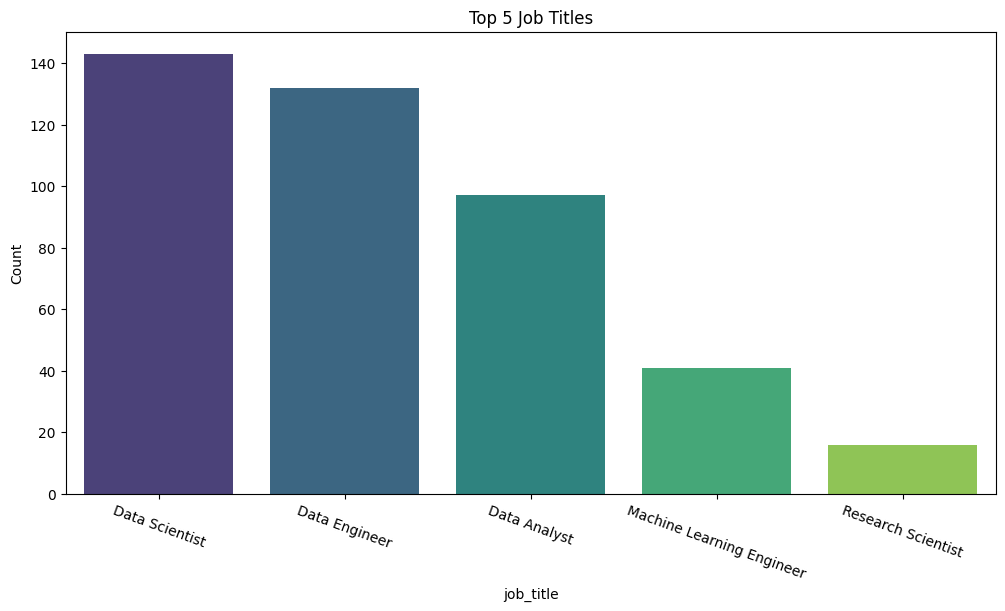

In [54]:
plt.figure(figsize = (12, 6))
# plt.bar(x=df4.index, height=df4.values)
sns.barplot(x=df4.index, y=df4.values, palette='viridis')
plt.title('Top 5 Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=-20)
plt.show()

In [55]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [56]:
df5 = df[['salary_in_usd', 'company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [59]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == 'L']
labels = ['Medium', 'Large', 'Small']
sal_mean = [S['salary_in_usd'].mean(), M['salary_in_usd'].mean(), L['salary_in_usd'].mean()]

In [60]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [61]:
label_change = np.round([x/1000 for x in sal_mean], 2)
label_change = list(map(str, label_change))
label_change = [x + ' K' for x in label_change]
label_change

['77.63 K', '116.91 K', '119.24 K']

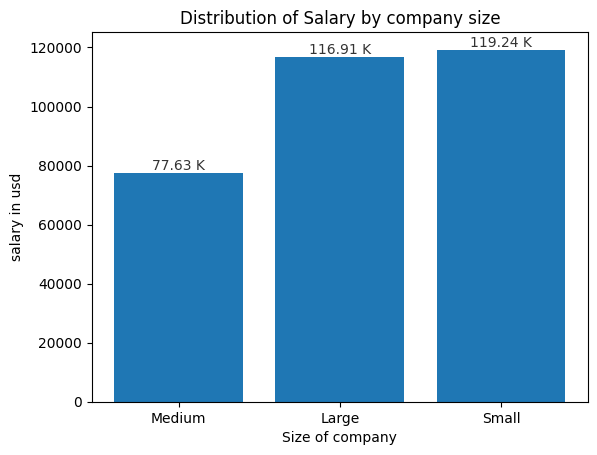

In [64]:
z = plt.bar(labels, sal_mean)
plt.bar_label(z, label_change, alpha=0.8)
plt.title('Distribution of Salary by company size')
plt.xlabel('Size of company')
plt.ylabel('salary in usd')
plt.show()

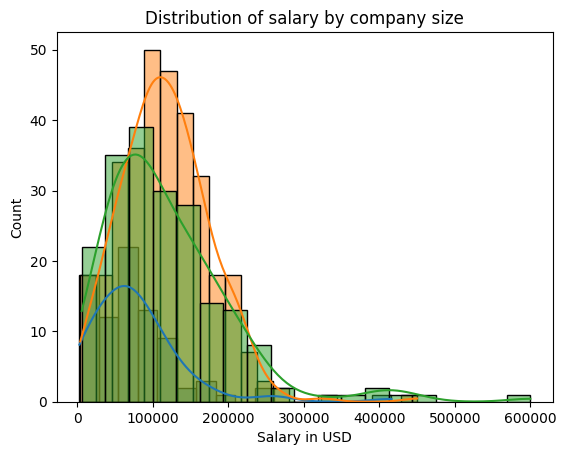

In [69]:
sns.histplot(S['salary_in_usd'], label="Small", kde=True)
sns.histplot(M['salary_in_usd'], label="Medium", kde=True)
sns.histplot(L['salary_in_usd'], label="Large", kde=True)
plt.title('Distribution of salary by company size')
plt.xlabel('Salary in USD')
plt.show()

In [70]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [76]:
df6 = df.experience_level.value_counts()
df6

experience_level
Senior         280
Middle         213
Entry Level     88
Executive       26
Name: count, dtype: int64

In [73]:
df6.index.tolist()

['SE', 'MI', 'EN', 'EX']

In [74]:
exp_map = {
    'SE': 'Senior',
    'MI': 'Middle',
    'EN': 'Entry Level',
    'EX': 'Executive'
}

In [75]:
df['experience_level'].replace(exp_map, inplace=True)

/tmp/ipykernel_21617/3845758377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience_level'].replace(exp_map, inplace=True)


In [77]:
labels = df6.index.to_list()
labels

['Senior', 'Middle', 'Entry Level', 'Executive']

In [78]:
values = df6.values
values

array([280, 213,  88,  26])

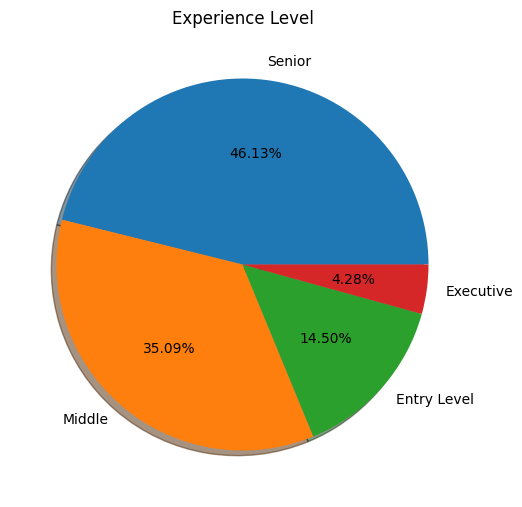

In [82]:
plt.figure(figsize=(6, 12))
plt.pie(x=values, labels=labels, autopct='%1.2f%%', shadow=True)
plt.title('Experience Level')
plt.show()